# 1. Get dataset

In [2]:
import pandas as pd

# Correct the path to the file
path = 'World-Stock-Prices-Dataset.csv'  # Ensure this file exists in the current working directory
dataset = pd.read_csv(path)
# Display the first few rows of the DataFrame
print(dataset.head())

                        Date        Open        High         Low       Close  \
0  2025-05-30 00:00:00-04:00    7.020000    7.240000    6.920000    7.100000   
1  2025-05-30 00:00:00-04:00  102.639999  102.940002  100.790001  102.000000   
2  2025-05-30 00:00:00-04:00   71.610001   72.470001   71.610001   72.099998   
3  2025-05-30 00:00:00-04:00  125.080002  126.190002  123.750000  124.510002   
4  2025-05-30 00:00:00-04:00  294.970001  295.750000  291.630005  294.049988   

       Volume  Dividends  Stock Splits             Brand_Name Ticker  \
0  12750600.0        0.0           0.0                peloton   PTON   
1   1505500.0        0.0           0.0                  crocs   CROX   
2  28013500.0        0.0           0.0  the coca-cola company     KO   
3     82500.0        0.0           0.0                 adidas  ADDYY   
4   5251700.0        0.0           0.0       american express    AXP   

      Industry_Tag  Country  Capital Gains  
0          fitness      usa            Na

# 2. Preprocessing

In [7]:
# Filter the dataset for the ticker "AAPL"
ticker = "AAPL"
df = dataset[dataset['Ticker'] == ticker].copy()

# Convert 'Date' to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

print(f"Filtered dataset for ticker '{ticker}':")
print(df.head())


Filtered dataset for ticker 'AAPL':
                        Date      Open      High       Low     Close  \
0  2000-01-03 00:00:00-05:00  0.794800  0.852586  0.770643  0.848323   
1  2000-01-04 00:00:00-05:00  0.820377  0.838376  0.766854  0.776801   
2  2000-01-05 00:00:00-05:00  0.786273  0.837902  0.780590  0.788168   
3  2000-01-06 00:00:00-05:00  0.804273  0.810904  0.719961  0.719961   
4  2000-01-07 00:00:00-05:00  0.731329  0.765433  0.723751  0.754065   

        Volume  Dividends  Stock Splits Brand_Name Ticker Industry_Tag  \
0  535796800.0        0.0           0.0      apple   AAPL   technology   
1  512377600.0        0.0           0.0      apple   AAPL   technology   
2  778321600.0        0.0           0.0      apple   AAPL   technology   
3  767972800.0        0.0           0.0      apple   AAPL   technology   
4  460734400.0        0.0           0.0      apple   AAPL   technology   

  Country  Capital Gains  
0     usa            NaN  
1     usa            NaN  
2    

# 3. Models

## I. LSTM

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Build the LSTM model ---
model = Sequential()
model.add(LSTM(32, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))  # Reduced units for speed
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# --- Train the model (optimized) ---
history = model.fit(
    X_lstm,
    y_lstm,
    epochs=20,           # Lowered for speed
    batch_size=32,       # Much faster than batch_size=1
    verbose=1
)

# --- Predict on training data ---
predictions = model.predict(X_lstm)

# NOTE: scaler_y here is only correct if you used a single scaler for all tickers.
# If you used one scaler per ticker, skip inverse_transform or use the correct one per prediction.

# Inverse transform (if single scaler_y used globally)
try:
    y_true = scaler_y.inverse_transform(y_lstm)
    y_pred = scaler_y.inverse_transform(predictions)

    # Display predictions
    for actual, predicted in zip(y_true.flatten(), y_pred.flatten()):
        print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

except Exception as e:
    print("Skipping inverse transform — scaler_y may be per-ticker or mismatched.")
    print("Error:", e)


Epoch 1/20


/usr/local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2007/2007 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0019
Epoch 2/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 1.3690e-04
Epoch 3/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 1.2963e-04
Epoch 4/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 9.4641e-05
Epoch 5/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.0266e-05
Epoch 6/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.8155e-05
Epoch 7/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 8.4970e-05
Epoch 8/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 7.7344e-05
Epoch 9/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 7.4197e-05
Epoch 10/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 8.9613e-05
Epoch 11/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 8.1933e-05
Epoch 12/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 9.3248e-05
Epoch 13/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 7.6189e-05
Epoch 14/20
2007/2007 ━━━━━━━━━━━━━━━━━━━━ 14s 7m

## II. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test) without shuffling — keep time order
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(
    X_lr, y_lr, test_size=0.2, shuffle=False
)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_lr_train, y_lr_train)

# Predict on test set
lr_predictions = lr_model.predict(X_lr_test)

# Inverse scale predictions and true values
y_true_lr = scaler_y.inverse_transform(y_lr_test)
y_pred_lr = scaler_y.inverse_transform(lr_predictions)

# Evaluate
mse = mean_squared_error(y_true_lr, y_pred_lr)
r2 = r2_score(y_true_lr, y_pred_lr)

print(f"Linear Regression Test MSE: {mse:.4f}")
print(f"Linear Regression Test R² Score: {r2:.4f}")

# Show predicted vs actual
for actual, predicted in zip(y_true_lr.flatten(), y_pred_lr.flatten()):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Linear Regression Test MSE: 0.0950
Linear Regression Test R² Score: 0.9986
Actual: 18.32, Predicted: 18.53
Actual: 2.93, Predicted: 3.00
Actual: 2.87, Predicted: 2.94
Actual: 2.84, Predicted: 2.87
Actual: 2.84, Predicted: 2.83
Actual: 2.83, Predicted: 2.84
Actual: 2.92, Predicted: 2.80
Actual: 2.89, Predicted: 2.96
Actual: 2.87, Predicted: 2.88
Actual: 2.83, Predicted: 2.88
Actual: 2.77, Predicted: 2.87
Actual: 2.76, Predicted: 2.77
Actual: 2.74, Predicted: 2.79
Actual: 2.76, Predicted: 2.77
Actual: 2.68, Predicted: 2.76
Actual: 2.67, Predicted: 2.69
Actual: 2.69, Predicted: 2.72
Actual: 2.61, Predicted: 2.71
Actual: 2.59, Predicted: 2.63
Actual: 2.60, Predicted: 2.60
Actual: 2.64, Predicted: 2.60
Actual: 2.61, Predicted: 2.66
Actual: 2.58, Predicted: 2.61
Actual: 2.67, Predicted: 2.59
Actual: 2.63, Predicted: 2.62
Actual: 2.52, Predicted: 2.62
Actual: 2.58, Predicted: 2.53
Actual: 2.65, Predicted: 2.58
Actual: 2.64, Predicted: 2.59
Actual: 2.68, Predicted: 2.64
Actual: 2.56, Predicted

# 4.Results

2007/2007 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


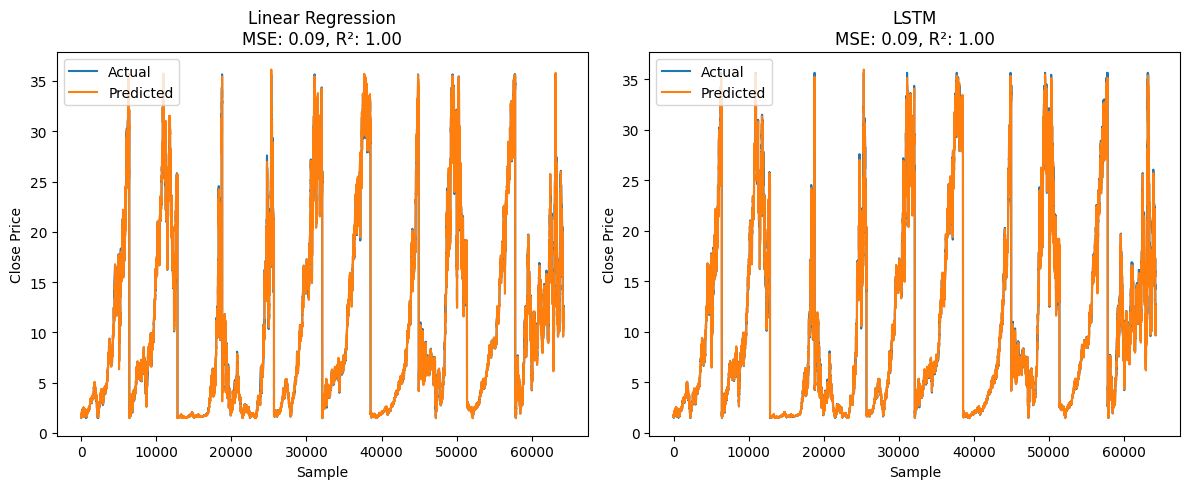

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ----- Linear Regression Evaluation -----
lr_predictions = lr_model.predict(X_lr)

# Inverse transform
y_true_lr = scaler_y.inverse_transform(y_lr)
y_pred_lr = scaler_y.inverse_transform(lr_predictions)

# Evaluate
mse_lr = mean_squared_error(y_true_lr, y_pred_lr)
r2_lr = r2_score(y_true_lr, y_pred_lr)

# ----- LSTM Evaluation -----
lstm_predictions = model.predict(X_lstm)

# Inverse transform
y_true_lstm = scaler_y.inverse_transform(y_lstm)
y_pred_lstm = scaler_y.inverse_transform(lstm_predictions)

# Evaluate
mse_lstm = mean_squared_error(y_true_lstm, y_pred_lstm)
r2_lstm = r2_score(y_true_lstm, y_pred_lstm)

# ----- Plot Results -----
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.plot(y_true_lr, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.title(f'Linear Regression\nMSE: {mse_lr:.2f}, R²: {r2_lr:.2f}')
plt.xlabel('Sample')
plt.ylabel('Close Price')
plt.legend()

# LSTM
plt.subplot(1, 2, 2)
plt.plot(y_true_lstm, label='Actual')
plt.plot(y_pred_lstm, label='Predicted')
plt.title(f'LSTM\nMSE: {mse_lstm:.2f}, R²: {r2_lstm:.2f}')
plt.xlabel('Sample')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()
